# 2 Minutes to kanoa

Understanding Water Quality Trends with AI-Powered Analytics

Everyone understands water quality - it's relatable, visual, and has real-world stakes. This example uses publicly available data from California's Harmful Algal Bloom Monitoring program ([CalHABMAP](https://calhabmap.org/)), which monitors water quality at piers along the California coast.

## Setup

First, let's import the necessary libraries and configure our environment.

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
from dotenv import load_dotenv

# Import kanoa
from kanoa import AnalyticsInterpreter

# Load API keys from user config
config_dir = Path.home() / ".config" / "kanoa"
if (config_dir / ".env").exists():
    load_dotenv(config_dir / ".env")

print("✓ Setup complete!")

✓ Setup complete!


## Load Water Quality Data

We'll use data from Scripps Pier in La Jolla, CA. This pier has been monitored weekly since 2008, providing temperature, chlorophyll, nutrients, and harmful algae counts.

**Data Source**: [SCCOOS ERDDAP](https://erddap.sccoos.org) - California HAB Monitoring and Alert Program

In [2]:
"""
Analyzing coastal water quality at Scripps Pier, La Jolla, CA
Data: California HAB Monitoring and Alert Program (CalHABMAP)
Source: SCCOOS ERDDAP - https://erddap.sccoos.org
"""

# Load water quality data from Scripps Pier (weekly monitoring since 2008)
# Data includes: temperature, chlorophyll, nutrients, harmful algae counts
url = (
    "https://erddap.sccoos.org/erddap/tabledap/HABs-ScrippsPier.csv"
    "?time%2CTemp%2CAvg_Chloro%2CPseudo_nitzschia_seriata_group"
    "&time%3E=2024-01-01&time%3C=2025-12-10"
)

# Read the data, skipping the units row
df = pd.read_csv(url, skiprows=[1])
df["time"] = pd.to_datetime(df["time"])

print(f"Loaded {len(df)} water quality observations from 2024")
print("\nFirst few rows:")
df.head()

Loaded 98 water quality observations from 2024

First few rows:


,time,Temp,Avg_Chloro,Pseudo_nitzschia_seriata_group
0,2024-01-03 20:49:00+00:00,16.4,3.04,0.0
1,2024-01-08 21:33:00+00:00,15.6,1.67,0.0
2,2024-01-15 20:10:00+00:00,14.8,7.04,20026.0
3,2024-01-22 21:56:00+00:00,15.1,3.81,13768.0
4,2024-01-29 19:49:00+00:00,15.4,1.38,5632.0


## Visualize the Data

Create a multi-panel visualization showing:
- **Panel 1**: Water temperature (seasonal patterns)
- **Panel 2**: Chlorophyll-a (algal biomass indicator)
- **Panel 3**: Harmful algae (Pseudo-nitzschia - produces domoic acid neurotoxin)

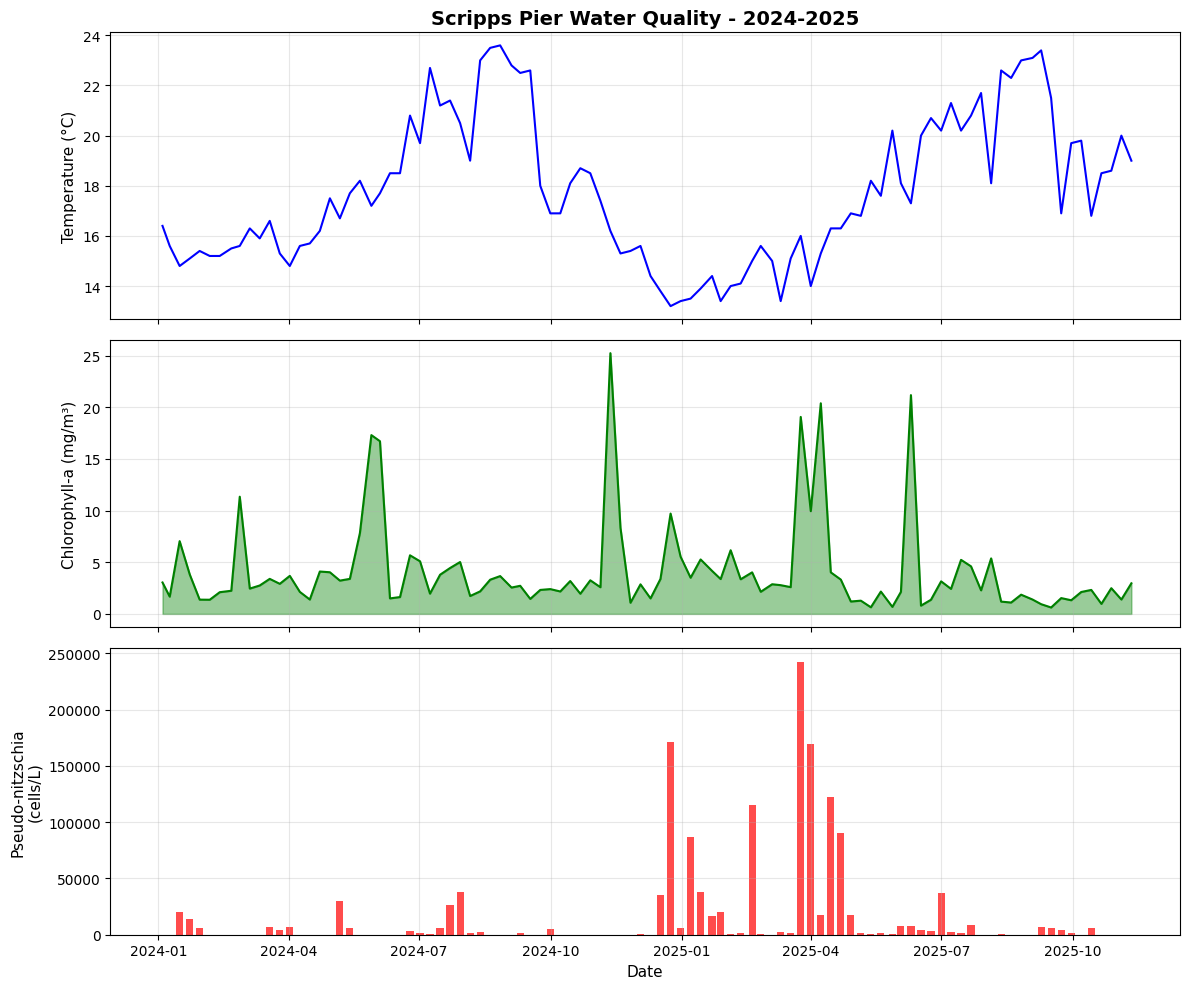

In [3]:
# Create a multi-panel visualization
fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# Panel 1: Water temperature
axes[0].plot(df["time"], df["Temp"], "b-", linewidth=1.5)
axes[0].set_ylabel("Temperature (°C)", fontsize=11)
axes[0].set_title(
    "Scripps Pier Water Quality - 2024-2025", fontsize=14, fontweight="bold"
)
axes[0].grid(alpha=0.3)

# Panel 2: Chlorophyll (algal biomass indicator)
axes[1].fill_between(df["time"], 0, df["Avg_Chloro"], alpha=0.4, color="green")
axes[1].plot(df["time"], df["Avg_Chloro"], "g-", linewidth=1.5)
axes[1].set_ylabel("Chlorophyll-a (mg/m³)", fontsize=11)
axes[1].grid(alpha=0.3)

# Panel 3: Harmful algae (Pseudo-nitzschia - produces domoic acid neurotoxin)
axes[2].bar(
    df["time"], df["Pseudo_nitzschia_seriata_group"], width=5, color="red", alpha=0.7
)
axes[2].set_ylabel("Pseudo-nitzschia\n(cells/L)", fontsize=11)
axes[2].set_xlabel("Date", fontsize=11)
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Interpret with kanoa

This is where kanoa shines. Instead of manually analyzing the patterns, let's get an AI-powered interpretation.

**Note**: Make sure you have set up your API key. See the [Authentication Guide](https://github.com/lhzn-io/kanoa/blob/main/docs/source/user_guide/authentication.md) for details.

In [ ]:
# Initialize the interpreter (defaults to Gemini)
# Ensure GOOGLE_API_KEY is set in your environment
interpreter = AnalyticsInterpreter(backend="gemini", model="gemini-2.5-flash")

# Get AI-powered interpretation of the water quality trends
# Set stream=True to see the analysis as it's generated
result = interpreter.interpret(
    fig=fig,
    context="Coastal water quality monitoring at Scripps Pier, La Jolla, CA",
    focus="Identify any concerning patterns, potential HAB events, and seasonal trends",
    stream=True,
)

# The result is automatically displayed in Jupyter notebooks


<div style="background: rgba(2, 62, 138, 0.08);
            border: 1px solid rgba(2, 62, 138, 0.3);
            border-left: 4px solid rgba(2, 62, 138, 0.8);
            padding: 16px 20px;
            margin: 10px 0;
            border-radius: 8px;
            backdrop-filter: blur(5px);
            box-shadow: 0 2px 8px rgba(0, 0, 0, 0.08);">

<div style="font-weight: 600; margin-bottom: 12px; opacity: 0.9; font-size: 1.1em; font-family: 'SF Mono', 'Monaco', 'Inconsolata', 'Fira Mono', 'Droid Sans Mono', 'Source Code Pro', monospace;">gemini</div>

This analytical output presents three key water quality parameters at Scripps Pier from 2024 to late 2025: Water Temperature, Chlorophyll-a, and *Pseudo-nitzschia* cell counts.

### 1. Summary

The data illustrates the seasonal variability of coastal water temperature, the dynamics of phytoplankton biomass (Chlorophyll-a), and the occurrence of *Pseudo-nitzschia* blooms, a genus associated with harmful algal blooms (HABs). A clear seasonal temperature cycle is observed, with multiple phytoplankton blooms occurring throughout the year, and notable, significant *Pseudo-nitzschia* bloom events, particularly in late 2024 and early to mid-2025.

### 2. Key Observations

*   **Temperature (°C)**: Displays a strong annual cycle, ranging from approximately 13-14°C in winter (Jan-Feb) to 23-24°C in late summer/early fall (Aug-Sep).
*   **Chlorophyll-a (mg/m³)**: Shows episodic peaks indicating phytoplankton blooms. Significant peaks include ~17 mg/m³ in May 2024, a dominant peak of ~25 mg/m³ in late Dec 2024/early Jan 2025, and additional high peaks of ~18-21 mg/m³ in March and May 2025.
*   **Pseudo-nitzschia (cells/L)**: Generally low or absent, but with distinct, often very high, bloom events.
    *   Minor elevations (~20,000-40,000 cells/L) occur in Jan, Apr, and Jul 2024.
    *   Major bloom activity begins in late 2024, peaking at ~240,000 cells/L in mid-Dec 2024.
    *   Sustained high levels (110,000-250,000 cells/L) are observed from Jan to April 2025, with the largest peak reaching ~250,000 cells/L in mid-March 2025.
    *   Fewer, smaller events are noted in mid-2025.
*   **Interrelationships**:
    *   The largest Chlorophyll-a peak (Dec 2024/Jan 2025) precedes or coincides with the most intense *Pseudo-nitzschia* blooms (Dec 2024 - April 2025).
    *   *Pseudo-nitzschia* bloom activity appears to be highest during the cooler water months (late fall, winter, early spring) or transitional periods when temperatures are rising from their winter minimums.

### 3. Technical Interpretation

*   **Temperature Cycle**: The observed temperature fluctuations are typical for temperate coastal marine environments like Southern California, driven by seasonal solar radiation and regional oceanographic processes (e.g., coastal upwelling, El Niño/La Niña cycles that can affect seasonal norms).
*   **Phytoplankton Dynamics (Chlorophyll-a)**: The episodic Chlorophyll-a peaks indicate periods of high primary productivity. These blooms are often fueled by nutrient inputs, such as those from coastal upwelling or runoff. The large bloom in late 2024/early 2025 might suggest a significant nutrient pulse or favorable light conditions.
*   ***Pseudo-nitzschia* Blooms and HAB Risk**: *Pseudo-nitzschia* species are diatoms known to produce domoic acid, a potent neurotoxin responsible for amnesic shellfish poisoning (ASP). The observed cell counts, particularly the sustained peaks exceeding 100,000 cells/L from late 2024 through spring 2025, are **highly concerning** and strongly indicative of significant HAB events. These concentrations are well above typical alert thresholds for potential domoic acid accumulation in shellfish and marine organisms.
    *   The co-occurrence of high Chlorophyll-a and *Pseudo-nitzschia* suggests that the general conditions favoring phytoplankton growth (nutrients, light) were conducive to *Pseudo-nitzschia* proliferation.
    *   The timing of major *Pseudo-nitzschia* blooms during cooler water periods (winter/spring) is common for some *Pseudo-nitzschia* species in California, which can thrive under specific nutrient and temperature regimes that may differ from those driving summer blooms of other phytoplankton.

### 4. Potential Issues

*   **Data Granularity**: While seemingly frequent, the exact sampling frequency (daily, weekly) is not specified. Interpretation benefits from knowing if these are discrete samples or averaged values over a period.
*   **Domoic Acid Levels**: This data only shows *Pseudo-nitzschia* cell counts, not the actual domoic acid concentration. Not all *Pseudo-nitzschia* blooms are toxic, and toxicity can vary significantly.
*   **Species Identification**: The data does not differentiate between *Pseudo-nitzschia* species, some of which are known to be more toxic than others.
*   **Environmental Context**: Missing data on key environmental drivers such as nutrient concentrations (nitrate, phosphate, silicate), salinity, irradiance, wind patterns, and upwelling indices, which would provide deeper insights into bloom triggers.

### 5. Recommendations

1.  **Domoic Acid Monitoring**: Immediately initiate or intensify monitoring of domoic acid in shellfish, plankton tows, and marine mammals/birds during and following periods of high *Pseudo-nitzschia* cell counts, especially when concentrations exceed ~50,000 cells/L.
2.  **Expanded Environmental Monitoring**: Collect concurrent data on nutrient levels, salinity, and local oceanographic conditions (e.g., upwelling strength, stratification) to better understand the drivers of *Pseudo-nitzschia* blooms.
3.  **Species-Specific Identification**: If resources allow, perform molecular or microscopic identification to determine the dominant *Pseudo-nitzschia* species present, as this can inform toxicity potential.
4.  **Public Health Alerts**: Establish clear protocols for issuing public health warnings (e.g., fisheries closures, consumption advisories) based on *Pseudo-nitzschia* cell count thresholds and/or measured domoic acid levels.
5.  **Long-term Trend Analysis**: Continue this monitoring program for multiple years to identify inter-annual variability and potential climate-driven shifts in bloom frequency, intensity, and timing.

---
<small>**gemini-2.5-flash** · 1,403→1,396 tokens · $0.0000</small>

</div>


## What You Get

kanoa analyzes the visualization and returns a structured interpretation including:

- **Visual Summary**: Description of the data patterns and ranges
- **Key Observations**: Identification of important trends and events
- **Technical Interpretation**: Scientific explanation of the observed patterns
- **Recommendations**: Actionable next steps for further analysis

The interpretation is grounded in the context you provide and focuses on the aspects you specify.

## Why This Example Works

1. **Universal relevance**: Everyone drinks water, goes to the beach, cares about ocean health
2. **Real public data**: Actual monitoring data freely available via SCCOOS ERDDAP
3. **Visual + quantitative**: Multiple data types in one figure (temp, chlorophyll, cell counts)
4. **Stakes are clear**: Harmful algal blooms cause real problems (2014 Toledo water crisis, marine mammal deaths)
5. **Actionable output**: The interpretation suggests concrete next steps

## Additional Data Sources

### Other California Piers

All CalHABMAP stations use the same ERDDAP pattern:

In [5]:
# Example: Load data from multiple piers
base_url = "https://erddap.sccoos.org/erddap/tabledap"
datasets = [
    "HABs-ScrippsPier",  # San Diego
    "HABs-NewportBeachPier",  # Orange County
    "HABs-SantaMonicaPier",  # LA
    "HABs-StearnsWharf",  # Santa Barbara
    "HABs-CalPolyPier",  # San Luis Obispo
    "HABs-MontereyWharf",  # Monterey
    "HABs-SantaCruzWharf",  # Santa Cruz
]

# Example query for any station:
# url = f"{base_url}/{dataset}.csv?time,Temp,Avg_Chloro&time>=2024-01-01"
# df = pd.read_csv(url, skiprows=[1])

### Alternative Water Quality Datasets

The same pattern works with other water quality monitoring programs:

- **Lake Erie HAB Monitoring**: [NOAA GLERL](https://www.ncei.noaa.gov/access/metadata/landing-page/bin/iso?id=gov.noaa.nodc:GLERL-CIGLR-HAB-LakeErie-water-qual)
- **EPA National Water Quality**: [National Aquatic Resource Surveys](https://www.epa.gov/national-aquatic-resource-surveys)
- **USGS Water Quality**: [Water Quality Portal](https://www.waterqualitydata.us/)

## Next Steps

Now that you've seen kanoa in action, explore more features:

- Try different backends (Claude, OpenAI)
- Add a knowledge base with domain-specific documents
- Interpret DataFrames directly
- Track costs and token usage

Check out the [User Guide](https://github.com/lhzn-io/kanoa/blob/main/docs/source/user_guide/index.md) for more advanced examples.